In [1]:
import scanpy as sc
import pandas as pd

[Executed on 2023-12-06 13:03:54.331743]


In [2]:
adata=sc.read_h5ad('/proj/sensoryaging/60_plates_data/Sgns/two_neuron_merged.h5ad')

[Executed on 2023-12-06 13:04:16.474525]


In [3]:
adata

[Executed on 2023-12-06 13:04:17.674247]


AnnData object with n_obs × n_vars = 203 × 30819
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'age', 'platesID', 'n_counts', 'leiden_1'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leide

In [4]:
adata.obs['cell_type'].value_counts()

[Executed on 2023-12-06 13:06:15.562267]


cell_type
Type_1C_neuron    56
Type_1A_neuron    54
type_1A_neuron    22
type_1C_neuron    22
Type_1B_neuron    19
type_1B_neuron    18
Type_2_neuron      8
type_2_neuron      4
Name: count, dtype: int64

In [7]:
import pandas as pd

# Assuming adata is your AnnData object

# Create a dictionary to map cell types to groups
cell_type_to_group = {
    'Type_1A_neuron': 'Type1A',
    'type_1A_neuron': 'Type1A',
    'Type_1B_neuron': 'Type1B',
    'type_1B_neuron': 'Type1B',
    'Type_1C_neuron': 'Type1C',
    'type_1C_neuron': 'Type1C',
    'Type_2_neuron': 'Type2',
    'type_2_neuron': 'Type2'
}

# Map cell types to groups and create a new 'group' column
adata.obs['neuron'] = adata.obs['cell_type'].map(cell_type_to_group)

# Check the value counts of the new 'group' column
print(adata.obs['neuron'].value_counts())


[Executed on 2023-12-06 13:09:43.192093]
neuron
Type1C    78
Type1A    76
Type1B    37
Type2     12
Name: count, dtype: int64


In [28]:
adata.obs['neuron']=adata.obs['neuron'].astype(str)


[Executed on 2023-12-06 13:16:50.019324]


In [32]:
type2=adata[adata.obs['neuron']=='Type2',:]

[Executed on 2023-12-06 13:17:29.541916]


In [33]:
type2

[Executed on 2023-12-06 13:17:30.814149]


View of AnnData object with n_obs × n_vars = 12 × 30819
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'age', 'platesID', 'n_counts', 'leiden_1', 'neuron'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg',

In [34]:
type2
type2.write_h5ad('/proj/sensoryaging/60_plates_data/Sgns/type2.h5ad')

[Executed on 2023-12-06 13:17:32.066252]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [35]:
sc.pl.violin?

[Executed on 2023-12-06 13:18:33.391825]


Signature:
sc.pl.violin(
    adata: anndata._core.anndata.AnnData,
    keys: Union[str, Sequence[str]],
    groupby: Optional[str] = None,
    log: bool = False,
    use_raw: Optional[bool] = None,
    stripplot: bool = True,
    jitter: Union[float, bool] = True,
    size: int = 1,
    layer: Optional[str] = None,
    scale: Literal['area', 'count', 'width'] = 'width',
    order: Optional[Sequence[str]] = None,
    multi_panel: Optional[bool] = None,
    xlabel: str = '',
    ylabel: Union[str, Sequence[str], NoneType] = None,
    rotation: Optional[float] = None,
    show: Optional[bool] = None,
    save: Union[bool, str, NoneType] = None,
    ax: Optional[matplotlib.axes._axes.Axes] = None,
    **kwds,
)
Docstring:
Violin plot.

Wraps :func:`seaborn.violinplot` for :class:`~anndata.AnnData`.

Parameters
----------
adata : AnnData
    Annotated data matrix.
keys : Union
    Keys for accessing variables of `.var_names` or fields of `.obs`.
groupby : Optional, optional (default: None)


[Executed on 2023-12-06 13:21:18.124016]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_ol

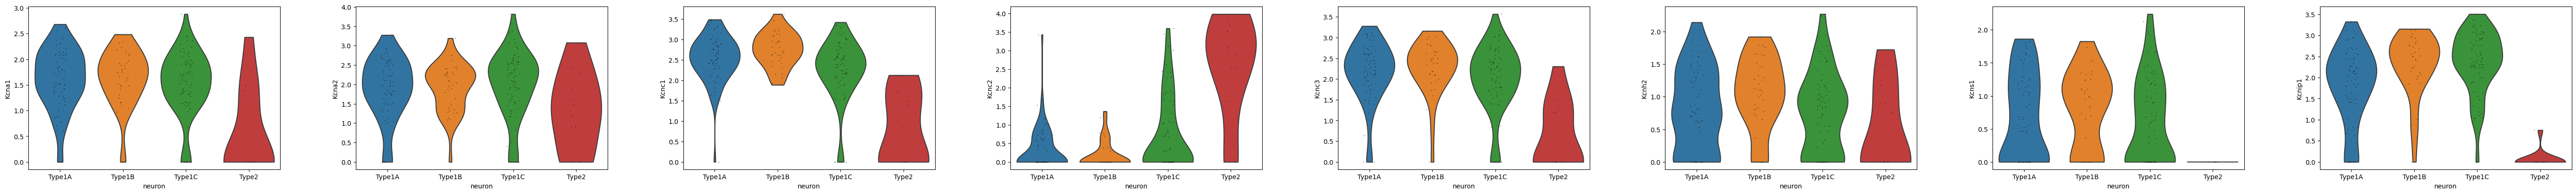

In [38]:
sc.pl.violin(adata,keys=['Kcna1','Kcna2','Kcnc1','Kcnc2','Kcnc1','Kcnc2','Kcnc3','Kcnh2','Kcns1','Kcnip1'],groupby='neuron',layer='log1p')